### Data Analysis and Machine Learning

*24 de Noviembre de 2021*

*Nicolás Tibatá*

In [ ]:
!pip install statsmodels --upgrade

In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 8.4 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 1.7 MB 27.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 52.8 MB/s 
     |████████████████████████████████| 6.8 MB 31.4 MB/s 
     |████████████████████████████████| 2.0 MB 31.5 MB/s 
     |████████████████████████████████| 1.3 MB 30.4 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 56.5 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 167 kB 66.7 MB/s 
     |████████████████████████████████| 596 kB 40.3 MB/s 
     |████████████████████████████████| 675 kB 49.3 MB/s 
     |████████████████████████████████| 10.1 MB 34.2 MB/s 
     |██████████████████

In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
from pycaret.regression import * 

OSError: dlopen(/Users/Nicolas/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/Nicolas/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

### Data Engineering

In [2]:
# Im going to add two variables of Robbery and Homicides for each locality
df = pd.read_csv('df_olx.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df['Localidad'].value_counts()

 Suba                  500
 Chapinero             321
 Kennedy               297
 Usaquén               289
 Usme                  244
 Santa Fé              218
 Teusaquillo           215
 Ciudad Bolívar        173
 Engativá              171
 Bosa                  165
 Rafael Uribe Uribe    147
 Puente Aranda         124
 San Cristóbal         110
 Fontibón              108
 Soacha                106
 Antonio Nariño         85
 Barrios Unidos         84
 Tunjuelito             63
 Los Mártires           42
 Candelaria             41
 II Y III                1
 Funza                   1
Name: Localidad, dtype: int64

In [5]:
# Soacha is not a locality of Bogotá
df = df.drop(df[df.Localidad == ' Soacha'].index)

In [6]:
# Not a locality
df = df.drop(df[df.Localidad == ' II Y III'].index)

In [7]:
# Not enough observations
df = df.drop(df[df.Localidad == ' Funza'].index)

In [8]:
len(df) # 3397 Rows

3397

In [9]:
def f(row):
    if row['Localidad'] == ' Suba':
        val = 7567
    elif row['Localidad'] == ' Chapinero':
        val = 5578
    elif row['Localidad'] == ' Kennedy':
        val = 8439
    elif row['Localidad'] == ' Usaquén':
        val = 5376
    elif row['Localidad'] == ' Usme':
        val = 1646
    elif row['Localidad'] == ' Santa Fé':
        val = 3255
    elif row['Localidad'] == ' Teusaquillo':
        val = 3506
    elif row['Localidad'] == ' Ciudad Bolívar':
        val = 3591
    elif row['Localidad'] == ' Engativá':
        val = 8151
    elif row['Localidad'] == ' Bosa':
        val = 4422
    elif row['Localidad'] == ' Rafael Uribe Uribe':
        val = 2805
    elif row['Localidad'] == ' Puente Aranda':
        val = 3778
    elif row['Localidad'] == ' San Cristóbal':
        val = 2365
    elif row['Localidad'] == ' Fontibón':
        val = 4739
    elif row['Localidad'] == ' Antonio Nariño':
        val = 1788
    elif row['Localidad'] == ' Barrios Unidos':
        val = 2975
    elif row['Localidad'] == ' Tunjuelito':
        val = 1736
    elif row['Localidad'] == ' Los Mártires':
        val = 2849
    else:
        val = 665
    return val

In [10]:
df['Robo_Personas'] = df.apply(f, axis=1)

In [11]:
df['Robo_Personas'].min() #The variable is perfect

665

In [12]:
def g(row):
    if row['Localidad'] == ' Suba':
        val = 43
    elif row['Localidad'] == ' Chapinero':
        val = 6
    elif row['Localidad'] == ' Kennedy':
        val = 136
    elif row['Localidad'] == ' Usaquén':
        val = 29
    elif row['Localidad'] == ' Usme':
        val = 51
    elif row['Localidad'] == ' Santa Fé':
        val = 36
    elif row['Localidad'] == ' Teusaquillo':
        val = 9
    elif row['Localidad'] == ' Ciudad Bolívar':
        val = 156
    elif row['Localidad'] == ' Engativá':
        val = 32
    elif row['Localidad'] == ' Bosa':
        val = 85
    elif row['Localidad'] == ' Rafael Uribe Uribe':
        val = 69
    elif row['Localidad'] == ' Puente Aranda':
        val = 16
    elif row['Localidad'] == ' San Cristóbal':
        val = 48
    elif row['Localidad'] == ' Fontibón':
        val = 21
    elif row['Localidad'] == ' Antonio Nariño':
        val = 11
    elif row['Localidad'] == ' Barrios Unidos':
        val = 10
    elif row['Localidad'] == ' Tunjuelito':
        val = 21
    elif row['Localidad'] == ' Los Mártires':
        val = 54
    else:
        val = 6
    return val

In [13]:
df['Homicidios'] = df.apply(g, axis=1)

In [14]:
df['Homicidios'].min() #The variable is perfect

6

In [15]:
df['Precio'] = [s.replace(".", "") for s in df['Precio']]

In [16]:
df #Our final Dataframe

,Precio,Metros Cuadrados,Habitaciones,Baños,Parqueadero,Estrato,Localidad,Barrio,Contacto,Robo_Personas,Homicidios
0,1650000000,250,3.0,3,NaN,6,Chapinero,Chicó Alto,0,5578,6
1,410000000,53,1.0,2,NaN,5,Usaquén,Rincón Del Chicó,0,5376,29
2,583300000,106,3.0,3,NaN,6,Suba,Niza Suba - Torres Del Monte,0,7567,43
3,520000000,130,3.0,3,NaN,6,Usaquén,Rincón De Santa Paula,3165279629,5376,29
4,350000000,118,3.0,3,Si,3,Suba,Cantalejo,0,7567,43
...,...,...,...,...,...,...,...,...,...,...,...
3500,602370000,88,3.0,2,NaN,4,Fontibón,Urbanización Industrial Montevideo,0,4739,21
3501,420000000,60,1.0,1,NaN,4,Teusaquillo,San Luís,0,3506,9
3502,560000000,360,4.0,2,NaN,3,Antonio Nariño,La Fragua,0,1788,11
3503,898000000,292,4.0,4,NaN,4,Teusaquillo,Pablo VI Etapa II,0,3506,9


-------

### Machine Learning 

In this case, we do a prediction model to a continue variable, wich is the price of the properties.

In [17]:
df.info() # We need to change the type of 'Precio' to an integer, same with 'Habitaciones'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Precio            3397 non-null   object 
 1   Metros Cuadrados  3397 non-null   int64  
 2   Habitaciones      3365 non-null   float64
 3   Baños             3397 non-null   int64  
 4   Parqueadero       1180 non-null   object 
 5   Estrato           3397 non-null   int64  
 6   Localidad         3397 non-null   object 
 7   Barrio            3397 non-null   object 
 8   Contacto          3397 non-null   int64  
 9   Robo_Personas     3397 non-null   int64  
 10  Homicidios        3397 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 318.5+ KB


In [18]:
df['Precio'] = df['Precio'].astype(str).astype(int)

In [19]:
df['Habitaciones'] = df['Habitaciones'].fillna(df['Habitaciones'].mean())
# We fill the NaN elements of the list, with the mean of that variable. To get all the rows

In [20]:
df['Habitaciones'] = df['Habitaciones'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Precio            3397 non-null   int64 
 1   Metros Cuadrados  3397 non-null   int64 
 2   Habitaciones      3397 non-null   int64 
 3   Baños             3397 non-null   int64 
 4   Parqueadero       1180 non-null   object
 5   Estrato           3397 non-null   int64 
 6   Localidad         3397 non-null   object
 7   Barrio            3397 non-null   object
 8   Contacto          3397 non-null   int64 
 9   Robo_Personas     3397 non-null   int64 
 10  Homicidios        3397 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 318.5+ KB


In [22]:
df.columns

Index(['Precio', 'Metros Cuadrados', 'Habitaciones', 'Baños', 'Parqueadero',
       'Estrato', 'Localidad', 'Barrio', 'Contacto', 'Robo_Personas',
       'Homicidios'],
      dtype='object')

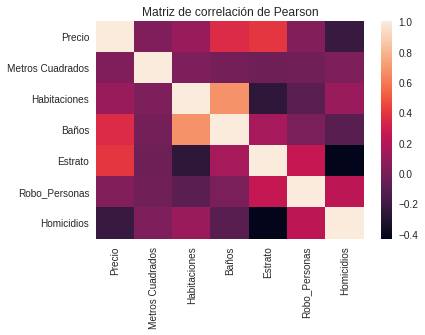

In [23]:
columns = ['Precio', 'Metros Cuadrados', 'Habitaciones', 'Baños',
       'Estrato', 'Robo_Personas', 'Homicidios']

correlation = df[columns].corr()
sns.heatmap(correlation)
plt.title('Matriz de correlación de Pearson')
plt.show()

In [56]:
data_reg = df[['Precio', 'Metros Cuadrados', 'Habitaciones', 'Baños',
       'Estrato', 'Robo_Personas', 'Homicidios', 'Localidad', 'Parqueadero']]
data_reg # The final variables for machine learning 

,Precio,Metros Cuadrados,Habitaciones,Baños,Estrato,Robo_Personas,Homicidios,Localidad,Parqueadero
0,1650000000,250,3,3,6,5578,6,Chapinero,NaN
1,410000000,53,1,2,5,5376,29,Usaquén,NaN
2,583300000,106,3,3,6,7567,43,Suba,NaN
3,520000000,130,3,3,6,5376,29,Usaquén,NaN
4,350000000,118,3,3,3,7567,43,Suba,Si
...,...,...,...,...,...,...,...,...,...
3500,602370000,88,3,2,4,4739,21,Fontibón,NaN
3501,420000000,60,1,1,4,3506,9,Teusaquillo,NaN
3502,560000000,360,4,2,3,1788,11,Antonio Nariño,NaN
3503,898000000,292,4,4,4,3506,9,Teusaquillo,NaN


In [57]:
var = ['Precio', 'Metros Cuadrados', 'Habitaciones', 'Baños',
       'Estrato', 'Robo_Personas', 'Homicidios']
data_reg[var] = data_reg[var].fillna(0)
# Preparing our data to the model

In [58]:
numeric = ['Metros Cuadrados', 'Habitaciones', 'Baños',
       'Estrato', 'Robo_Personas', 'Homicidios']
categorical = ['Localidad', 'Parqueadero']

In [59]:
regv1 = setup(data=data_reg, target='Precio', train_size = 0.8, numeric_features= numeric, categorical_features= categorical,
            transformation = True, normalize = True, transform_target = True, transform_target_method = 'box-cox')
# Box-Cox transformation is enough because our target variable doesn't have negative values.
# Otherwhise we need the yeo-johnson transformation

,Description,Value
0,session_id,2784
1,Target,Precio
2,Original Data,"(3397, 9)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2717, 28)"


In [60]:
get_config('X').head()

,Metros Cuadrados,Habitaciones,Baños,Estrato,Robo_Personas,Homicidios,Localidad_ Antonio Nariño,Localidad_ Barrios Unidos,Localidad_ Bosa,Localidad_ Candelaria,Localidad_ Chapinero,Localidad_ Ciudad Bolívar,Localidad_ Engativá,Localidad_ Fontibón,Localidad_ Kennedy,Localidad_ Los Mártires,Localidad_ Puente Aranda,Localidad_ Rafael Uribe Uribe,Localidad_ San Cristóbal,Localidad_ Santa Fé,Localidad_ Suba,Localidad_ Teusaquillo,Localidad_ Tunjuelito,Localidad_ Usaquén,Localidad_ Usme,Parqueadero_No,Parqueadero_Si,Parqueadero_not_available
0,1.198515,-0.056943,0.574410,1.711768,0.370480,-1.501101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.873211,-1.997578,-0.176833,1.177337,0.285269,-0.313596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.126620,-0.056943,0.574410,1.711768,1.158088,0.211687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.157901,-0.056943,0.574410,1.711768,0.285269,-0.313596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.019444,-0.056943,0.574410,-0.181606,1.158088,0.211687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
best = compare_models(sort='RMSE') # Lightgbm is our best model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.791811e+08,4.180445e+17,5.898739e+08,0.5162,0.4464,0.3559,0.111
gbr,Gradient Boosting Regressor,1.814681e+08,4.307186e+17,6.014462e+08,0.4932,0.4408,0.3576,0.219
knn,K Neighbors Regressor,1.972606e+08,4.560678e+17,6.216614e+08,0.4616,0.4848,0.3961,0.074
rf,Random Forest Regressor,1.858869e+08,4.608286e+17,6.229167e+08,0.4503,0.4717,0.3881,0.828
huber,Huber Regressor,1.955785e+08,4.587254e+17,6.233162e+08,0.4596,0.4832,0.4153,0.061
lr,Linear Regression,1.972028e+08,4.643068e+17,6.270538e+08,0.4533,0.4831,0.4043,0.022
ridge,Ridge Regression,1.972027e+08,4.644742e+17,6.271815e+08,0.4531,0.4831,0.4042,0.021
br,Bayesian Ridge,1.973037e+08,4.657285e+17,6.281494e+08,0.4514,0.4830,0.4040,0.022
et,Extra Trees Regressor,1.887557e+08,4.737787e+17,6.328154e+08,0.4239,0.4808,0.4266,0.738
omp,Orthogonal Matching Pursuit,2.109426e+08,4.550287e+17,6.342557e+08,0.4318,0.5254,0.4862,0.021


In [62]:
model = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.527884e+08,1.705538e+17,4.129816e+08,0.6138,0.4624,0.3885
1,2.076999e+08,7.218150e+17,8.495970e+08,0.4123,0.4475,0.3586
2,1.608410e+08,1.494797e+17,3.866260e+08,0.7323,0.4518,0.4199
3,1.975588e+08,3.043026e+17,5.516363e+08,0.4952,0.5058,0.3922
4,1.685948e+08,2.254936e+17,4.748617e+08,0.5356,0.3900,0.2956
5,1.505371e+08,2.598242e+17,5.097295e+08,0.4439,0.4357,0.3734
6,1.804206e+08,1.748909e+17,4.181996e+08,0.6803,0.3912,0.3243
7,1.354112e+08,7.889930e+16,2.808902e+08,0.7880,0.4068,0.3583
8,2.090961e+08,6.798924e+17,8.245559e+08,0.2082,0.5253,0.3083
9,2.288636e+08,1.415294e+18,1.189661e+09,0.2524,0.4477,0.3398


In [63]:
tuned_model = tune_model(model, optimize = 'RMSE', fold = 10, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.604106e+08,1.704238e+17,4.128241e+08,0.6141,0.4695,0.4224
1,2.086291e+08,6.999575e+17,8.366346e+08,0.4301,0.4534,0.3694
2,1.653276e+08,1.698569e+17,4.121370e+08,0.6958,0.4528,0.3900
3,2.112396e+08,3.402706e+17,5.833272e+08,0.4355,0.5054,0.3944
4,1.720301e+08,2.355248e+17,4.853090e+08,0.5149,0.3970,0.2987
5,1.508894e+08,2.643992e+17,5.141977e+08,0.4341,0.4615,0.4094
6,1.776230e+08,1.690114e+17,4.111099e+08,0.6910,0.3921,0.3186
7,1.370580e+08,7.639759e+16,2.764011e+08,0.7948,0.4106,0.3531
8,2.135351e+08,6.722585e+17,8.199137e+08,0.2171,0.5256,0.3165
9,2.364921e+08,1.409929e+18,1.187404e+09,0.2552,0.4423,0.3412


In [64]:
predictions = predict_model(tuned_model)
predictions.head(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.512151e+08,1.126998e+17,3.357079e+08,0.7562,0.3733,0.309


,Metros Cuadrados,Habitaciones,Baños,Estrato,Robo_Personas,Homicidios,Localidad_ Antonio Nariño,Localidad_ Barrios Unidos,Localidad_ Bosa,Localidad_ Candelaria,Localidad_ Chapinero,Localidad_ Ciudad Bolívar,Localidad_ Engativá,Localidad_ Fontibón,Localidad_ Kennedy,Localidad_ Los Mártires,Localidad_ Puente Aranda,Localidad_ Rafael Uribe Uribe,Localidad_ San Cristóbal,Localidad_ Santa Fé,Localidad_ Suba,Localidad_ Teusaquillo,Localidad_ Tunjuelito,Localidad_ Usaquén,Localidad_ Usme,Parqueadero_No,Parqueadero_Si,Parqueadero_not_available,Precio,Label
0,-0.485143,-0.056943,-0.176833,-0.181606,-0.692828,-0.032617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,185000000,2.811149e+08
1,0.043037,0.536385,0.574410,-1.111330,1.158088,0.211687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,195000000,3.573297e+08
2,-0.969230,-0.056943,-1.264304,-2.183614,-0.136150,1.095940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,155000000,1.388938e+08
3,-0.826137,-0.056943,-1.264304,-0.181606,1.481647,1.634624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,160000000,1.724221e+08
4,1.172216,-0.056943,0.574410,1.711768,0.370480,-1.501101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2100000000,1.790875e+09
5,0.393216,-0.056943,-0.176833,-0.181606,-0.136150,1.095940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,370000000,2.800541e+08
6,0.019444,-0.056943,0.574410,1.177337,0.285269,-0.313596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,446000000,6.743059e+08
7,1.606497,1.250023,0.574410,-0.181606,-1.441793,-1.207995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,580000000,5.194742e+08
8,-0.904937,-1.997578,-0.176833,1.177337,0.370480,-1.501101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,543530400,4.240597e+08
9,-0.764332,-0.056943,-0.176833,-1.111330,-0.438444,-0.934437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,230000000,1.655646e+08


In [ ]:
plot_model(tuned_model, 'feature', scale = 4)

In [66]:
mpl.rcParams['figure.dpi'] = 200

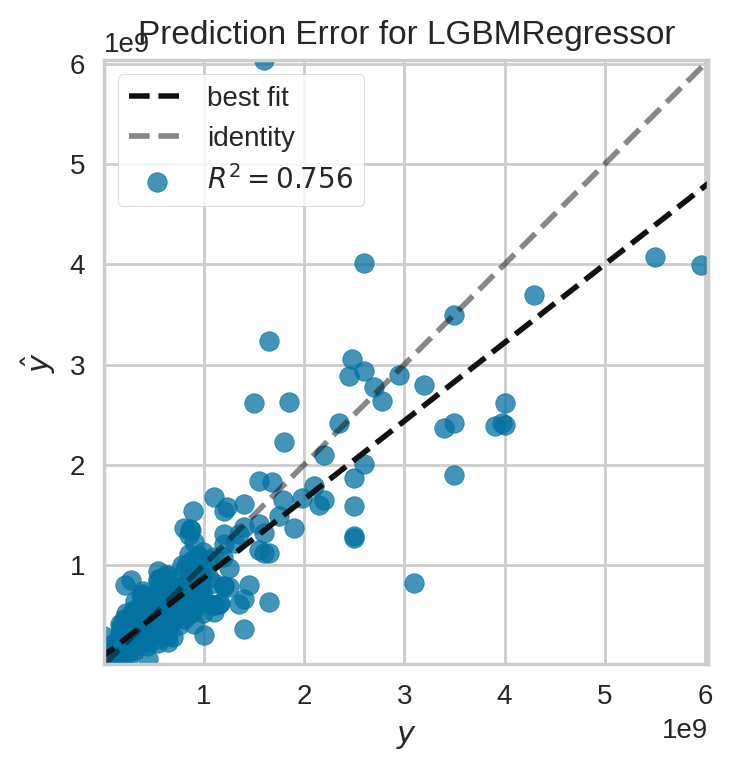

In [67]:
plot_model(tuned_model, 'error') # It's a decent model 